In [1]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
plt.rcParams.update({'font.size': 22})

In [2]:
denver_listing_dates_df = pd.read_csv('denver_listing_dates.csv')
denver_listing_dates_df['zipcode'] = denver_listing_dates_df['zipcode'].astype(str)

In [3]:
for event in 'list sale withdrawn expired cancelled'.split():
    column = event + '_date'
    denver_listing_dates_df[column] = pd.to_datetime(denver_listing_dates_df[column]).dt.date

In [4]:
print(denver_listing_dates_df.shape)
denver_listing_dates_df = denver_listing_dates_df[
    (denver_listing_dates_df['list_date'] < datetime.date.today()) &
    ((denver_listing_dates_df['sale_date'] < datetime.date.today()) |
     (denver_listing_dates_df['sale_date'].isna()))]
print(denver_listing_dates_df.shape)

(451235, 11)
(451231, 11)


In [5]:
denver_listing_dates_df.head()

,property_id,zipcode,latitude,longitude,list_date,sale_date,withdrawn_date,expired_date,cancelled_date,current_status,sale_price
0,139863800,80112,39.58203,-104.92111,2016-03-01,2016-03-01,NaT,NaT,NaT,Sale,475000.0
1,139817027,80112,39.56911,-104.80082,2016-03-01,2016-04-08,NaT,NaT,NaT,Sale,295000.0
2,482086548,80138,39.49819,-104.73505,2016-03-01,2016-05-19,NaT,NaT,NaT,Sale,412000.0
3,494122461,80211,39.75414,-105.03118,2016-03-01,NaT,NaT,2016-03-01,NaT,Expired,NaN
4,523793691,80516,40.09353,-104.99471,2016-03-01,2016-04-15,NaT,NaT,NaT,Sale,398000.0


In [6]:
is_duplicated = denver_listing_dates_df.duplicated('property_id', keep=False)
denver_listing_dates_df_duplicated = denver_listing_dates_df[is_duplicated]
denver_listing_dates_df_duplicated = denver_listing_dates_df_duplicated.sort_values('list_date')

In [7]:
denver_listing_dates_df_duplicated_grouped = denver_listing_dates_df_duplicated.groupby('property_id')

In [8]:
days_cutoff = 365
cnt = 0
days_later_lst = []
rows_to_exclude = []
for _, df in denver_listing_dates_df_duplicated_grouped:
    list_dates = list(df['list_date'])
    days_later = np.array([(list_dates[i + 1] - list_dates[i]).days for i in range(len(list_dates) - 1)])
    days_later_lst.extend(days_later)
    exclude_row = days_later < days_cutoff
    rows = df.index[1:]
    rows_to_exclude.extend(rows[exclude_row])

In [13]:
print(len(denver_listing_dates_df))
denver_listing_dates_df_cleaned = denver_listing_dates_df.drop(rows_to_exclude, axis=0)
print(len(denver_listing_dates_df_cleaned))

451231
436935


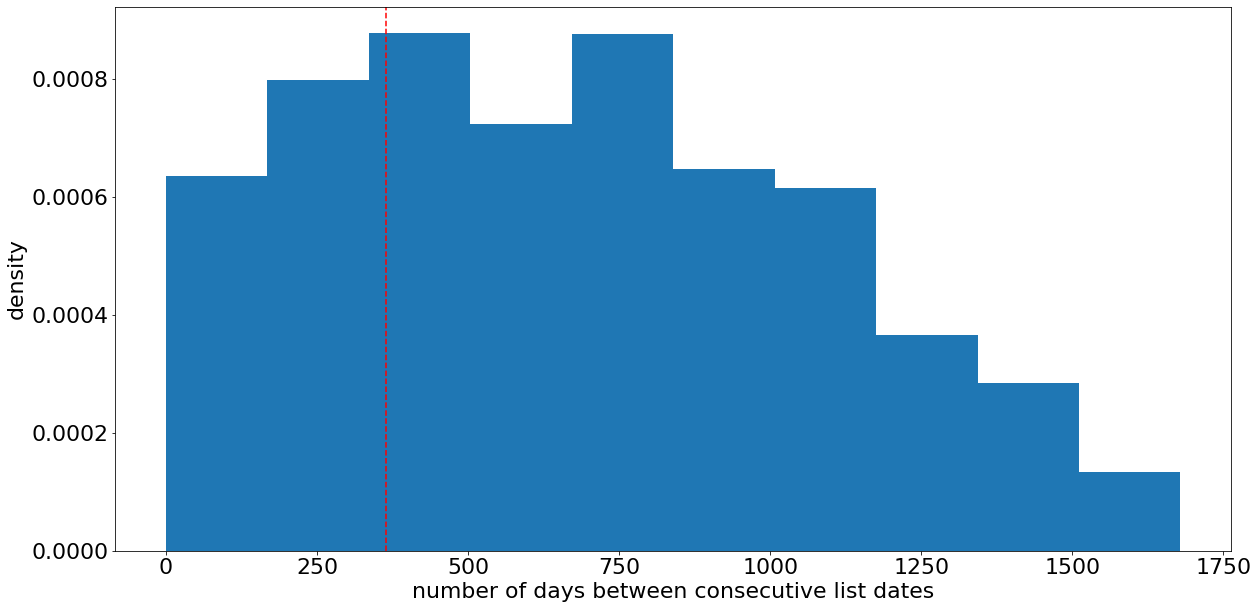

In [18]:
plt.figure(figsize=(20, 10))
plt.hist(days_later_lst, bins=10, density=True)
plt.xlabel('number of days between consecutive list dates')
plt.ylabel('density')
plt.axvline(x=days_cutoff, color='red', linestyle='--')
plt.show()

In [14]:
denver_listing_dates_df_cleaned.to_csv('denver_listing_dates_cleaned.csv', index=False)

In [17]:
(451231 - 436935) / 451231

0.03168222041482079